In [3]:
import pandas as pd

df = pd.read_csv("NAVHistory.txt", sep=';', on_bad_lines='skip', low_memory=False, dtype=str)

print(df.head())

                           Scheme Code  \
0  Open Ended Schemes ( Money Market )   
1                   Taurus Mutual Fund   
2                               139619   
3                               139619   
4                               139619   

                                         Scheme Name  \
0                                                NaN   
1                                                NaN   
2  Taurus Investor Education Pool - Unclaimed Div...   
3  Taurus Investor Education Pool - Unclaimed Div...   
4  Taurus Investor Education Pool - Unclaimed Div...   

  ISIN Div Payout/ISIN Growth ISIN Div Reinvestment Net Asset Value  \
0                         NaN                   NaN             NaN   
1                         NaN                   NaN             NaN   
2                         NaN                   NaN         10.0000   
3                         NaN                   NaN         10.0000   
4                         NaN                   NaN    

In [19]:
# Selecting only thr important columns
df = df[['Scheme Name', 'Net Asset Value', 'Date']]

# Converting NAV to numeric, coercing errors to NaN
df['Net Asset Value'] = pd.to_numeric(df['Net Asset Value'], errors='coerce')

# Droping the rows where NAV is missing or invalid
df = df.dropna(subset=['Net Asset Value'])

# Converting Date to datetime, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y', errors='coerce')

# Droping the rows with invalid dates
df = df.dropna(subset=['Date'])

# Reseting the index
df = df.reset_index(drop=True)

print(df.head())


                                         Scheme Name  Net Asset Value  \
0  Taurus Investor Education Pool - Unclaimed Div...             10.0   
1  Taurus Investor Education Pool - Unclaimed Div...             10.0   
2  Taurus Investor Education Pool - Unclaimed Div...             10.0   
3  Taurus Investor Education Pool - Unclaimed Div...             10.0   
4  Taurus Investor Education Pool - Unclaimed Div...             10.0   

        Date  
0 2024-05-02  
1 2024-05-03  
2 2024-05-06  
3 2024-05-07  
4 2024-05-08  


In [46]:
#top 10 mutual funds that we are analyzing
fund_list = [
    'Axis Bluechip Fund - Direct Plan - Growth',
    'Mirae Asset Large Cap Fund - Growth',
    'Parag Parikh Flexi Cap Fund - Regular Plan - Growth',
    'Quant Active Fund-GROWTH OPTION - Regular Plan',
    'HDFC Mid-Cap Opportunities Fund - Growth',
    'Nippon India Small Cap Fund - Growth',
    'SBI Small Cap Fund - Regular Plan - Growth',
    'ICICI Prudential Equity & Debt Fund - Growth',
    'CANARA ROBECO ELSS TAX SAVER - REGULAR PLAN - GROWTH OPTION',
    'Nippon India Index Fund - Nifty 50 Plan - Growth'
]

In [49]:
#analyzing each fund
summary = []

for fund in fund_list:
    fund_df = df[df['Scheme Name'].str.contains(fund, case=False, na=False)].copy()
    
    if fund_df.empty:
        print(f"❌ Fund not found: {fund}")
        continue
    
    fund_df = fund_df.sort_values('Date')
    
    start_nav = fund_df['Net Asset Value'].iloc[0]
    end_nav = fund_df['Net Asset Value'].iloc[-1]
    
    start_date = fund_df['Date'].iloc[0]
    end_date = fund_df['Date'].iloc[-1]
    
    years = (end_date - start_date).days / 365
    
    cagr = ((end_nav / start_nav) ** (1 / years)) - 1
    
    summary.append({
        'Fund Name': fund,
        'Start NAV': start_nav,
        'End NAV': end_nav,
        'Start Date': start_date.date(),
        'End Date': end_date.date(),
        '1Y CAGR (%)': round(cagr * 100, 2)
    })

In [5]:
import matplotlib.pyplot as plt

✅ Plotting Axis Bluechip Fund - Direct Plan - Growth


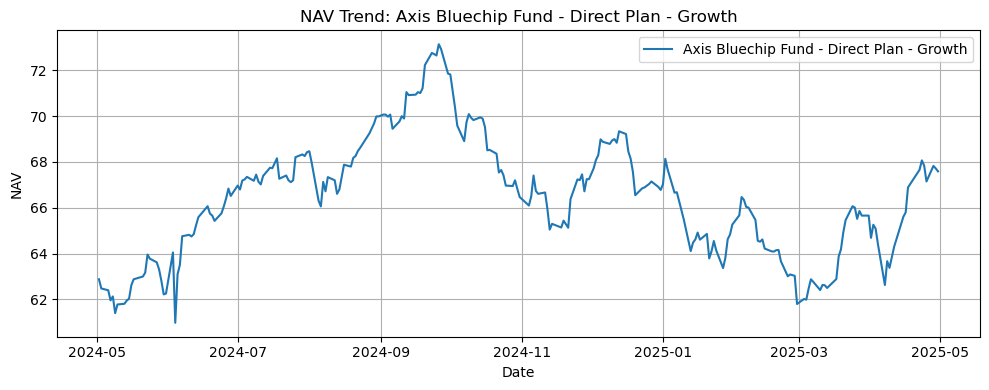

✅ Plotting Mirae Asset Large Cap Fund - Growth


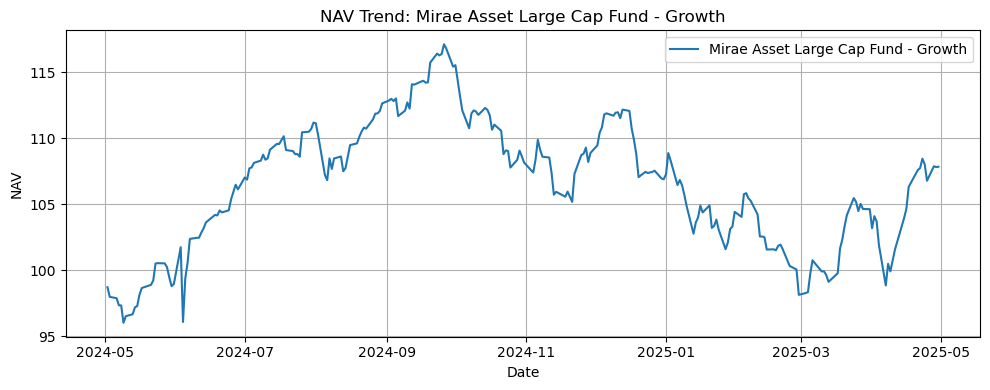

✅ Plotting Parag Parikh Flexi Cap Fund - Regular Plan - Growth


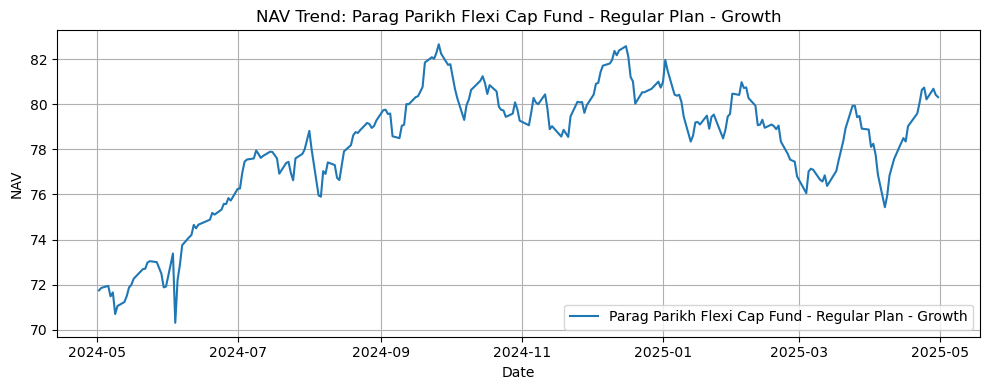

✅ Plotting Quant Active Fund-GROWTH OPTION - Regular Plan


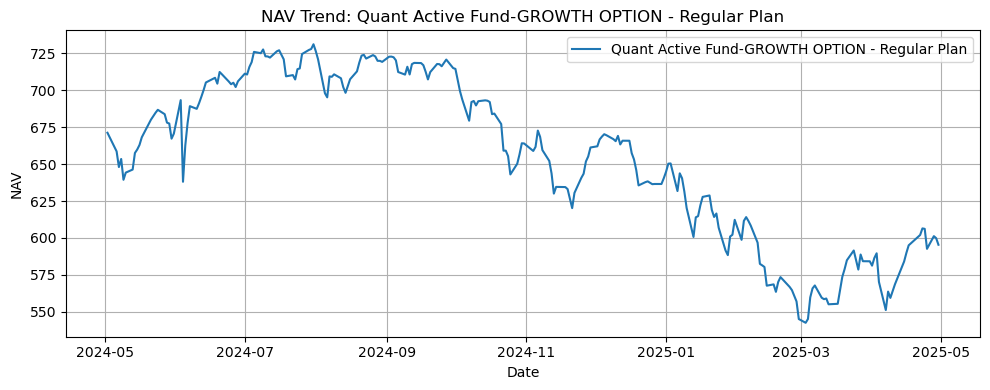

✅ Plotting HDFC Mid-Cap Opportunities Fund - Growth


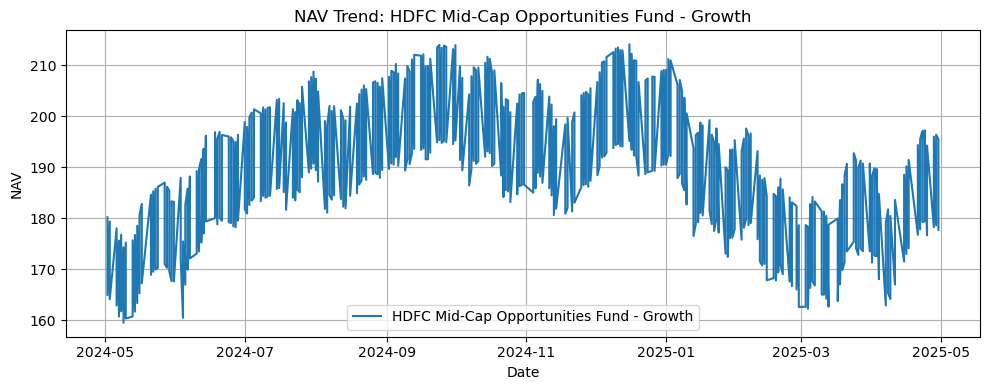

✅ Plotting Nippon India Small Cap Fund - Growth


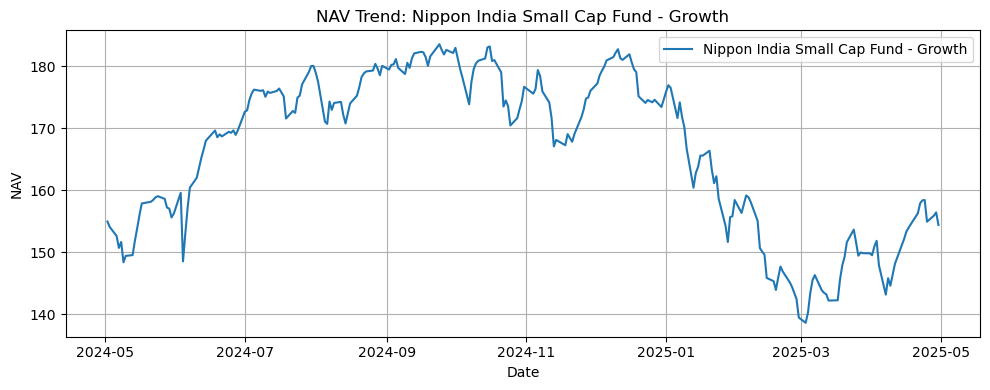

✅ Plotting SBI Small Cap Fund - Regular Plan - Growth


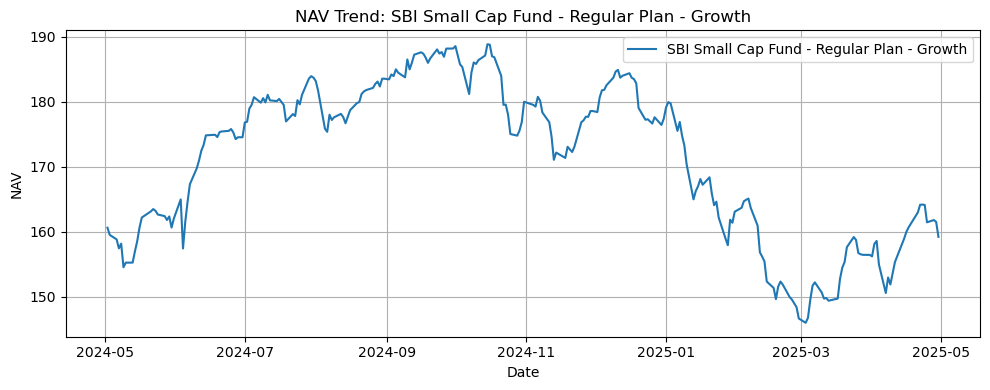

✅ Plotting ICICI Prudential Equity & Debt Fund - Growth


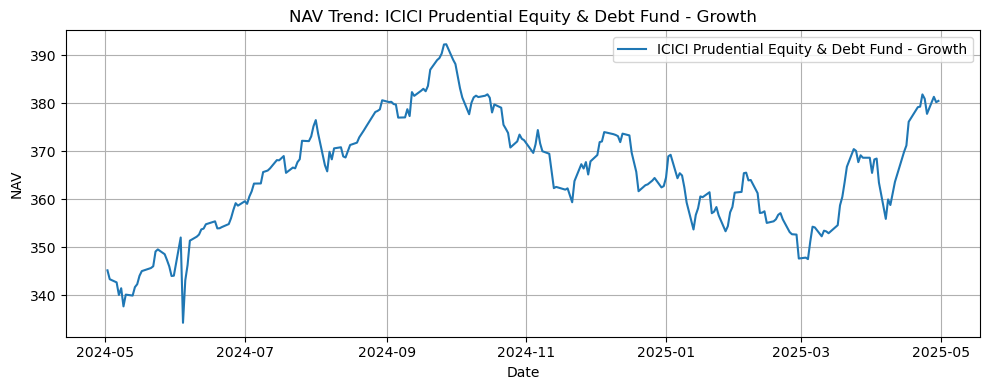

✅ Plotting CANARA ROBECO ELSS TAX SAVER - REGULAR PLAN - GROWTH OPTION


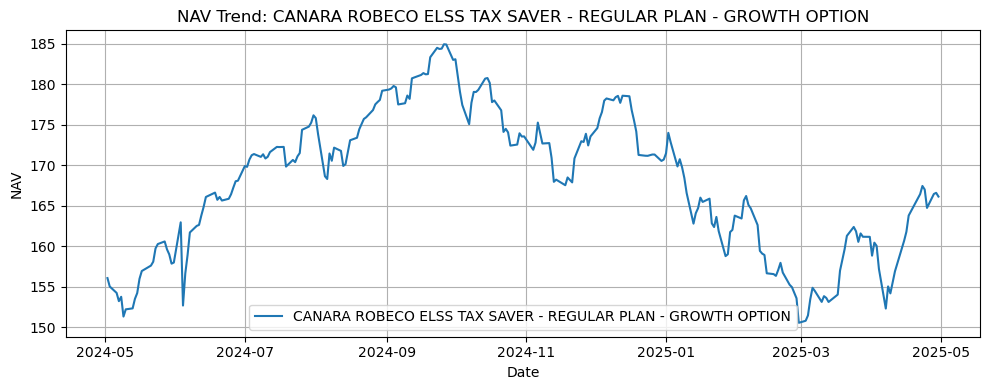

✅ Plotting Nippon India Index Fund - Nifty 50 Plan - Growth


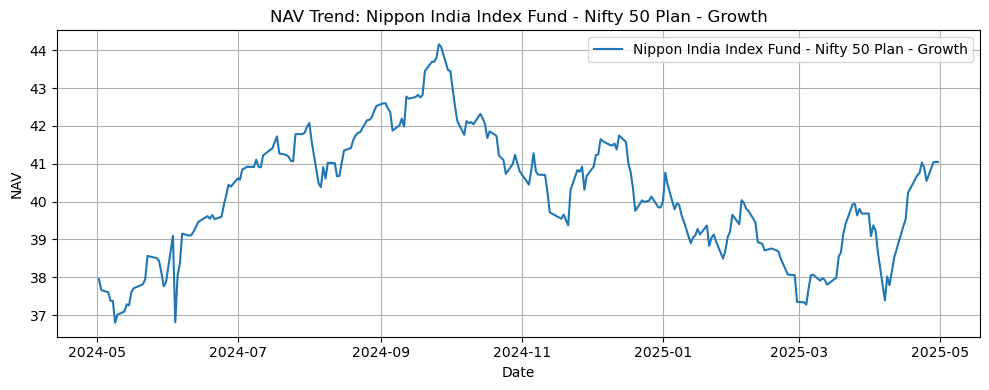

In [63]:
for fund in fund_list:
    fund_df = df[df['Scheme Name'].str.contains(fund, case=False, na=False)].copy()
    
    if fund_df.empty:
        print(f"❌ Fund not found: {fund}")
        continue
    
    fund_df = fund_df.sort_values('Date')
    fund_df = fund_df.dropna(subset=['Net Asset Value'])  # ensure valid NAV

    if fund_df.shape[0] < 10:
        print(f"⚠️ Not enough data to plot for {fund}")
        continue

    print(f"✅ Plotting {fund}")

    plt.figure(figsize=(10, 4))
    plt.plot(fund_df['Date'], fund_df['Net Asset Value'], label=fund)
    plt.title(f'NAV Trend: {fund}')
    plt.xlabel('Date')
    plt.ylabel('NAV')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Monthly Projection

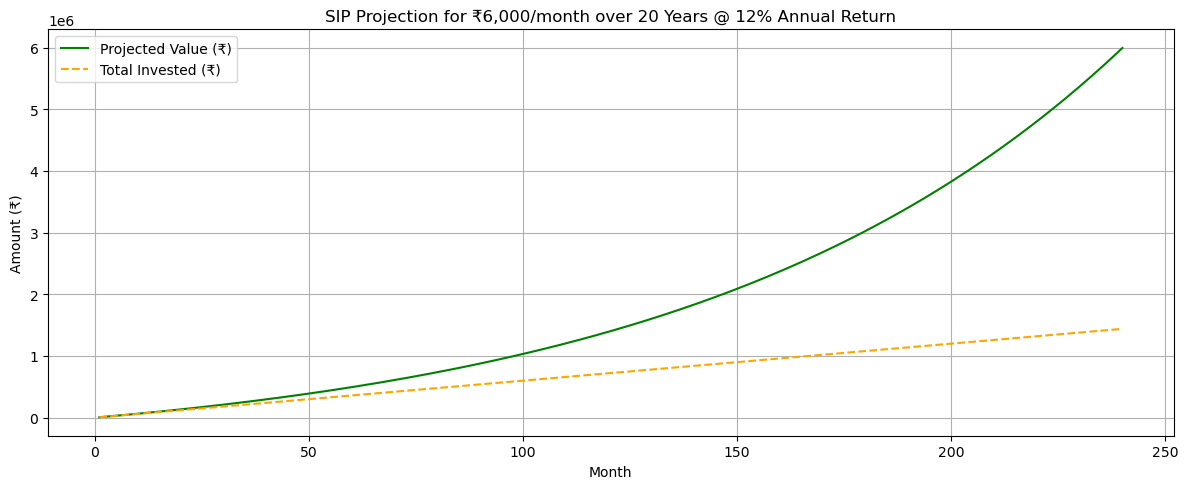

In [65]:
monthly_sip = 6000
annual_return = 0.12
monthly_return = annual_return / 12
months = 240

sip_values = []
total_invested = []
current_value = 0

for month in range(1, months + 1):
    current_value = (current_value + monthly_sip) * (1 + monthly_return)
    sip_values.append(current_value)
    total_invested.append(month * monthly_sip)

df_sip = pd.DataFrame({
    'Month': range(1, months + 1),
    'Total Invested': total_invested,
    'Projected Value': sip_values
})

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(df_sip['Month'], df_sip['Projected Value'], label='Projected Value (₹)', color='green')
plt.plot(df_sip['Month'], df_sip['Total Invested'], label='Total Invested (₹)', color='orange', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Amount (₹)')
plt.title('SIP Projection for ₹6,000/month over 20 Years @ 12% Annual Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
funds = [
    {"name": "Axis Bluechip Fund", "cagr": 0.11},
    {"name": "Mirae Asset Large Cap Fund", "cagr": 0.12},
    {"name": "Nippon India Index Fund", "cagr": 0.10},
    {"name": "HDFC Mid-Cap Opportunities Fund", "cagr": 0.13},
    {"name": "SBI Small Cap Fund", "cagr": 0.14},
    {"name": "Nippon India Small Cap Fund", "cagr": 0.14},
    {"name": "Parag Parikh Flexi Cap Fund", "cagr": 0.13},
    {"name": "Quant Active Fund", "cagr": 0.15},
    {"name": "ICICI Prudential Equity & Debt Fund", "cagr": 0.10},
    {"name": "Canara Robeco Equity Tax Saver Fund", "cagr": 0.12}
]

monthly_sip = 600
months = 240  # 20 years
sip_data = []

for fund in funds:
    name = fund["name"]
    cagr = fund["cagr"]
    monthly_rate = (1 + cagr) ** (1 / 12) - 1
    value = 0
    fund_values = []
    
    for m in range(1, months + 1):
        value = value * (1 + monthly_rate) + monthly_sip
        fund_values.append(value)

    sip_data.append(pd.DataFrame({
        "Month": list(range(1, months + 1)),
        "Fund": name,
        "Value": fund_values,
        "Invested": [monthly_sip * m for m in range(1, months + 1)]
    }))

sip_df = pd.concat(sip_data)

portfolio_summary = sip_df.groupby("Month").agg({
    "Value": "sum",
    "Invested": "sum"
}).reset_index()

final_summary = portfolio_summary.iloc[-1]
final_summary


Month       2.400000e+02
Value       5.853947e+06
Invested    1.440000e+06
Name: 239, dtype: float64

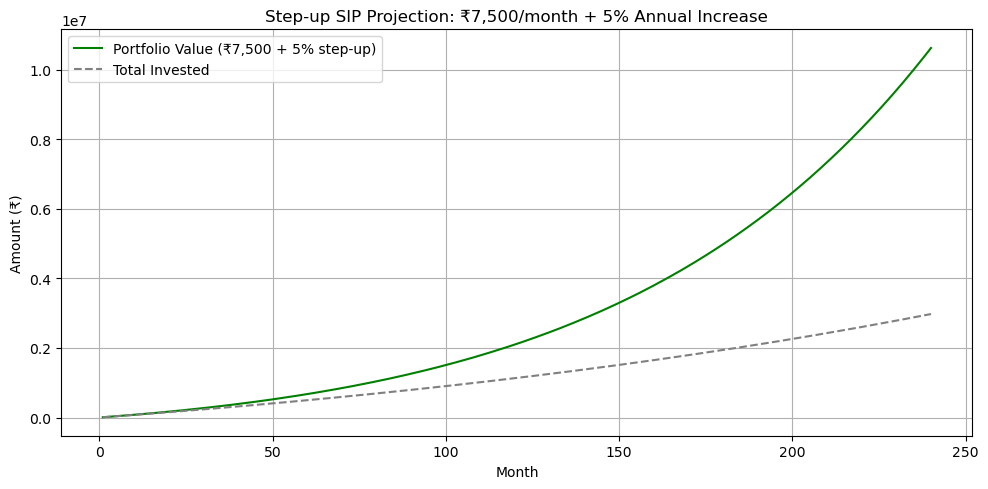

'/mnt/data/SIP_Projection_StepUp_7500_5Percent.xlsx'

In [13]:

funds = [
    "Axis Bluechip Fund",
    "Mirae Asset Large Cap Fund",
    "Nippon India Index Fund",
    "HDFC Mid-Cap Opportunities Fund",
    "SBI Small Cap Fund",
    "Nippon India Small Cap Fund",
    "Parag Parikh Flexi Cap Fund",
    "Quant Active Fund",
    "ICICI Prudential Equity & Debt Fund",
    "Canara Robeco Equity Tax Saver Fund"
]

fund_cagr = {
    "Axis Bluechip Fund": 0.117,
    "Mirae Asset Large Cap Fund": 0.123,
    "Nippon India Index Fund": 0.126,
    "HDFC Mid-Cap Opportunities Fund": 0.134,
    "SBI Small Cap Fund": 0.146,
    "Nippon India Small Cap Fund": 0.149,
    "Parag Parikh Flexi Cap Fund": 0.132,
    "Quant Active Fund": 0.142,
    "ICICI Prudential Equity & Debt Fund": 0.107,
    "Canara Robeco Equity Tax Saver Fund": 0.120
}

initial_sip = 7500  # initial monthly SIP
annual_step_up_rate = 0.05  # 5% step-up per year
duration_years = 20
duration_months = duration_years * 12

monthly_sip_values = []
for year in range(duration_years):
    sip_value = initial_sip * ((1 + annual_step_up_rate) ** year)
    monthly_sip_values.extend([sip_value] * 12)

monthly_sip_values = monthly_sip_values[:duration_months]

sip_records_stepup = []
for fund, cagr in fund_cagr.items():
    monthly_rate = (1 + cagr) ** (1 / 12) - 1
    future_value = 0
    for month in range(1, duration_months + 1):
        sip_amount = monthly_sip_values[month - 1] / len(funds)
        future_value = future_value * (1 + monthly_rate) + sip_amount
        sip_records_stepup.append((month, fund, future_value))
        
sip_df_stepup = pd.DataFrame(sip_records_stepup, columns=["Month", "Fund", "Value"])
portfolio_summary_stepup = sip_df_stepup.groupby("Month")["Value"].sum().reset_index()
portfolio_summary_stepup["Invested"] = pd.Series(monthly_sip_values).cumsum()

excel_df_stepup = sip_df_stepup.pivot(index="Month", columns="Fund", values="Value")
excel_df_stepup["Total Portfolio Value"] = excel_df_stepup.sum(axis=1)
excel_df_stepup["Total Invested"] = pd.Series(monthly_sip_values).cumsum().values

plt.figure(figsize=(10, 5))
plt.plot(portfolio_summary_stepup["Month"], portfolio_summary_stepup["Value"], label="Portfolio Value (₹7,500 + 5% step-up)", color="green")
plt.plot(portfolio_summary_stepup["Month"], portfolio_summary_stepup["Invested"], label="Total Invested", color="gray", linestyle="--")
plt.title("Step-up SIP Projection: ₹7,500/month + 5% Annual Increase")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

excel_path_stepup
